In [552]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [553]:
import numpy as np
import pandas as pd
import datetime as dt
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [554]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float

In [555]:
from sqlalchemy import create_engine

In [556]:
database_path = "Resources/hawaii.sqlite"
#10-Advanced-Data-Storage-and-Retrieval/Instructions/Resources/hawaii.sqlite


In [557]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")
#Base.metadata.create_all(engine)+tables from metadata
conn = engine.connect()


In [558]:
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [559]:
# reflect the tables
# Base.prepare(engine, reflect=True)

In [560]:
session = Session(bind=engine)
Base.classes.keys()

['measurement', 'measurements', 'station']

In [561]:
Measurement  = Base.classes.measurement
Station = Base.classes.station

In [562]:
 # Flask Setup
app = Flask(__name__)

In [563]:
@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/names<br/>"
        f"/api/v1.0/station"
    )


In [564]:
session

In [565]:
# @app.route("/api/v1.0/stations")
# def stations():
#     # Create our session (link) from Python to the DB
#     session = Session(engine)


In [653]:
"""Return a list of all Stations"""
    # Query all stations
results = session.query(Station.station).limit(10).all()

print (results)

[('USC00519397',), ('USC00513117',), ('USC00514830',), ('USC00517948',), ('USC00518838',), ('USC00519523',), ('USC00519281',), ('USC00511918',), ('USC00516128',)]


In [654]:
[x[0] for x in results]

['USC00519397',
 'USC00513117',
 'USC00514830',
 'USC00517948',
 'USC00518838',
 'USC00519523',
 'USC00519281',
 'USC00511918',
 'USC00516128']

In [657]:
data = engine.execute("SELECT * FROM measurement")
data.fetchall()

397', '2011-10-05', None, 79.0),
 (588, 'USC00519397', '2011-10-06', 0.0, 75.0),
 (589, 'USC00519397', '2011-10-07', 0.03, 78.0),
 (590, 'USC00519397', '2011-10-08', 0.0, 79.0),
 (591, 'USC00519397', '2011-10-09', 0.0, 78.0),
 (592, 'USC00519397', '2011-10-10', 0.02, 77.0),
 (593, 'USC00519397', '2011-10-11', 0.03, 78.0),
 (594, 'USC00519397', '2011-10-12', 0.0, 77.0),
 (595, 'USC00519397', '2011-10-13', 0.0, 77.0),
 (596, 'USC00519397', '2011-10-14', 0.03, 78.0),
 (597, 'USC00519397', '2011-10-15', 0.02, 77.0),
 (598, 'USC00519397', '2011-10-16', 0.0, 76.0),
 (599, 'USC00519397', '2011-10-17', 0.02, 77.0),
 (600, 'USC00519397', '2011-10-18', 0.01, 76.0),
 (601, 'USC00519397', '2011-10-19', 0.0, 74.0),
 (602, 'USC00519397', '2011-10-20', 0.0, 78.0),
 (603, 'USC00519397', '2011-10-21', 0.0, 76.0),
 (604, 'USC00519397', '2011-10-22', 0.0, 77.0),
 (605, 'USC00519397', '2011-10-23', 0.0, 75.0),
 (606, 'USC00519397', '2011-10-24', 0.14, 74.0),
 (607, 'USC00519397', '2011-10-25', 1.6, 77.0),

In [658]:
data = pd.read_sql("SELECT * FROM measurement", conn)
all_data = engine.execute('select*from measurement')
for row in data:
      print(row)

data.head()

id
station
date
prcp
tobs


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [659]:
#Creating session (link) from Python to the DB
# session.query(Measurement.station).all()

# Exploratory Precipitation Analysis

In [660]:
# Find the oldest date in the data set.
session.query(func.min(Measurement.date)).all()

[('2010-01-01')]

In [661]:
#Most recent date in the data set.
session.query(func.max(Measurement.date)).all()

[('2017-08-23')]

In [662]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
result = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date < '2017-08-23').\
order_by(Measurement.date).all()


In [663]:
df=pd.DataFrame(result,columns=['date', 'prcp'])
df=df.sort_values('date')

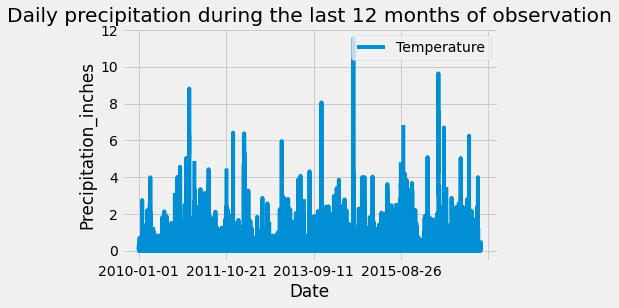

In [664]:
df.plot(x='date', y='prcp')
plt.xlabel("Date")
plt.ylabel("Precipitation_inches")
plt.title("Daily precipitation during the last 12 months of observation")
plt.legend(['Temperature', 'Date'], loc='upper right')

In [665]:
 #Perform a query to retrieve the data and precipitation scores
prcp_result = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(Measurement.date <'2017-08-23').\
order_by(Measurement.date).all()
print(prcp_result)

-18', 0.0, 75.0), ('2017-04-18', 0.15, 76.0), ('2017-04-18', 2.03, 68.0), ('2017-04-18', 0.98, 71.0), ('2017-04-19', 0.02, 74.0), ('2017-04-19', 0.02, 70.0), ('2017-04-19', 0.0, 83.0), ('2017-04-19', None, 76.0), ('2017-04-19', 0.0, 74.0), ('2017-04-19', 0.02, 67.0), ('2017-04-19', 0.14, 71.0), ('2017-04-20', 0.05, 78.0), ('2017-04-20', 0.33, 75.0), ('2017-04-20', 0.0, 74.0), ('2017-04-20', None, 75.0), ('2017-04-20', 0.35, 76.0), ('2017-04-20', 0.05, 76.0), ('2017-04-20', 0.0, 69.0), ('2017-04-21', 0.23, 73.0), ('2017-04-21', 1.16, 70.0), ('2017-04-21', 1.05, 70.0), ('2017-04-21', None, 74.0), ('2017-04-21', 2.36, 70.0), ('2017-04-21', 1.74, 69.0), ('2017-04-21', 1.84, 70.0), ('2017-04-22', 0.32, 76.0), ('2017-04-22', 1.01, 74.0), ('2017-04-22', 0.7, 74.0), ('2017-04-22', 1.58, 72.0), ('2017-04-22', 1.35, 73.0), ('2017-04-23', 0.03, 77.0), ('2017-04-23', 0.02, 75.0), ('2017-04-23', 0.06, 76.0), ('2017-04-23', 0.35, 70.0), ('2017-04-24', 0.0, 77.0), ('2017-04-24', 0.0, 76.0), ('2017-04

In [666]:

# Save the query results as a Pandas DataFrame and set the index to the date column - req
# Data to Pandas Pandas Dataframe
data = pd.read_sql("SELECT * FROM measurement", conn)

data.head(10)



,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [668]:
# Data to Pandas Pandas Dataframe
data = pd.read_sql("SELECT * FROM measurement", conn)
all_data = engine.execute('select*from measurement')
for row in data:
     print(row)

data.head()

id
station
date
prcp
tobs


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


# Exploratory Station Analysis

In [675]:
# Design a query to calculate the total number stations in the dataset
data.station.count()

19550

In [676]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data.prcp.describe()

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64

In [682]:
#Design a query to find the most active stations (i.e. what stations have the most rows?) - SEE BELOW
# List the stations and the counts in ascending order.
# data = station.counts(station, ascending = True)
# session.query(Measurement.date).\
# filter(Measurement.date < '2017-08-23').\
# order_by(Measurement.date).all()


In [683]:
dt_recent = session.query(func.max(Measurement.date)).all()[0][0]
dt_recent

'2017-08-23'

In [684]:
from dateutil import parser
from datetime import timedelta

parser.parse("2017-08-23") - timedelta(days = 365)

datetime.datetime(2016, 8, 23, 0, 0)

In [685]:
# Calculate the date one year from the last date in data set.
#Parser.parse is same as strptime which is used to convert string into datetime object
Date_time = parser.parse("2017-08-23") - timedelta(days = 365)

In [686]:
import datetime
#We shall be using strftime to convert datetime into strong
date_time_str = '2018-06-29 08:15:27.243860'

date_time_obj = datetime.datetime.strftime(Date_time, '%Y-%m-%d')
date_time_obj

'2016-08-23'

In [687]:

# List the stations and the counts in descending order. '2017-08-23' - RAN
# session.query(Measurement.date).\
#  filter(Measurement.date > date_time_obj).\
#  order_by(Measurement.date).all()

In [688]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Active_temp = session.query(
# func.count(Measurement.tobs).group_by(Measurement.tobs).all()
# print(sorted(Active_temp))



In [689]:
 result = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.tobs < '2017-08-23').\
order_by(Measurement.tobs).all()


In [690]:
df=pd.DataFrame(result,columns=['date','tobs'])
df=df.sort_values('tobs')

In [691]:
 # Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_st_result = session.query(Measurement.id, Measurement.date, Measurement.tobs).\
filter(Measurement.id ==2772).\
order_by(Measurement.date).all()

print(active_st_result)


[(2772, '2010-02-19', 63.0)]


In [692]:
active_st_result = pd.DataFrame(active_st_result,columns=['id','date','tobs'])
active_st_result=df.sort_values('tobs')

In [693]:
active_st_result

,date,tobs
0,2013-04-02,53.0
1,2013-01-16,54.0
2,2013-04-03,55.0
8,2015-03-13,56.0
3,2014-12-31,56.0
...,...,...
19545,2015-08-28,86.0
19547,2017-05-23,87.0
19548,2017-07-03,87.0
19546,2010-08-23,87.0


<AxesSubplot:ylabel='Frequency'>

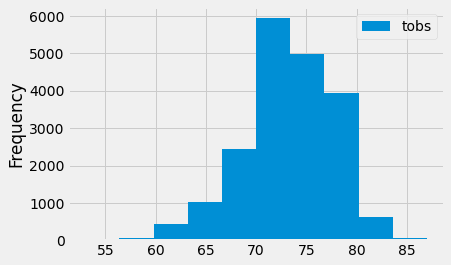

In [694]:
active_st_result.plot.hist()

In [695]:
active_st_result.describe()

,tobs
count,19550.000000
mean,73.097954
std,4.523527
min,53.000000
25%,70.000000
50%,73.000000
75%,76.000000
max,87.000000


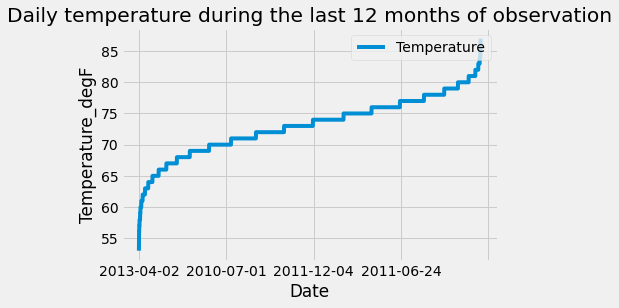

In [696]:
active_st_result.plot(x='date', y='tobs')
plt.xlabel("Date")
plt.ylabel("Temperature_degF")
plt.title("Daily temperature during the last 12 months of observation")
plt.legend(['Temperature', 'Date'], loc='upper right')

In [697]:
Active_ID_df = pd.DataFrame({
    "Station": [511,1372, 1979, 2202, 2612, 2669, 2709, 2724, 2772],
    "Temperature": [72.0,75.0,66.0,67.0,73.0,75.0,67.0,65.0,70.0],
})
Active_ID_df

,Station,Temperature
0,511,72.0
1,1372,75.0
2,1979,66.0
3,2202,67.0
4,2612,73.0
5,2669,75.0
6,2709,67.0
7,2724,65.0
8,2772,70.0


In [698]:
Active_ID_df.Temperature.describe()

count     9.000000
mean     70.000000
std       3.905125
min      65.000000
25%      67.000000
50%      70.000000
75%      73.000000
max      75.000000
Name: Temperature, dtype: float64

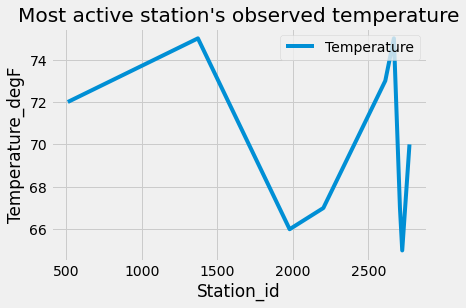

In [699]:
Active_ID_df.plot(x='Station', y='Temperature')
plt.xlabel("Station_id")
plt.ylabel("Temperature_degF")
plt.title("Most active station's observed temperature")
plt.legend(['Temperature', 'Date'], loc='upper right')

In [700]:
#print(active_result)

# Close session